In [1]:
#data wranling & pre-processing
import pandas as pd
import numpy as np

from itertools import cycle

import sklearn
from sklearn.model_selection import train_test_split
#cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

#model validation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ( 
    confusion_matrix,accuracy_score,
    roc_auc_score,roc_curve,auc,
    classification_report,mean_absolute_error,
    mean_squared_error,cohen_kappa_score,
    log_loss,precision_score,f1_score,recall_score,fbeta_score,matthews_corrcoef)

#machine learning algorithms
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier,Pool,cv,CatBoostRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
import sklearn.linear_model as lm
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow import keras
from scipy import interp,stats

#data visualization
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib as mpl
#import matplotlib.pylab as pylab
import seaborn as sns
#mpl.style.use('ggplot')
sns.set_style('white')
#pylab.rcParams['figure.figsize']=10,8

import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

In [2]:
dt=pd.read_csv(r'data_hd.csv')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
dt[dt['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2


In [4]:
dt[dt['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [5]:
miss=["?"]
df=pd.read_csv(r'data_hd.csv',na_values=miss)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num_hd      0
dtype: int64

In [7]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
num_hd      False
dtype: bool

In [8]:
#df.loc[df['ca'].isna()== True]
df[df['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [9]:
df[df['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


In [10]:
df=df.fillna(method='ffill')

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num_hd      0
dtype: int64

In [12]:
df.iloc[[87,266,166,192,287,302]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,3.0,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,6.0,2
166,52,1,3,138,223,0,0,169,0,0.0,1,0.0,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,3.0,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,2.0,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,1.0,3.0,0


In [13]:
df.iloc[[87,266,166,192,287,302],[11,12]]

,ca,thal
87,0.0,3.0
266,0.0,6.0
166,0.0,3.0
192,3.0,7.0
287,2.0,7.0
302,1.0,3.0


In [14]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2


In [15]:
#Renameing features to proper name
df.columns=['Age','Sex','Chest_pain','Rest_blood_pressure','Serum_cholesterol',
            'Fasting_blood_sugar','RestingECG','Max_heart_rate','Exercise_angina',
           'ST_Depression','Slope','No._of_vessels','Thalassemia','HeartDisease']
df.head()

,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [16]:
print("HeartDisease:0-No Risk,1-Low Risk,2-High Risk,3-Very High Risk")
print("*"*40)
print(df.HeartDisease.value_counts(),sep='\n')
print("*"*40)

HeartDisease:0-No Risk,1-Low Risk,2-High Risk,3-Very High Risk
****************************************
0    164
1     55
2     36
3     35
4     13
Name: HeartDisease, dtype: int64
****************************************


In [17]:
df["HeartDisease"]=df.HeartDisease.apply(lambda x:'No Risk' if x==0 else 'Risk')
print(df.HeartDisease.value_counts(),sep='\n')

No Risk    164
Risk       139
Name: HeartDisease, dtype: int64


In [18]:
print("Sex:1=Male,0=Female")
print("*"*40)
print(df.Sex.value_counts(),sep='\n')
print("*"*40)

Sex:1=Male,0=Female
****************************************
1    206
0     97
Name: Sex, dtype: int64
****************************************


In [19]:
df["Sex"]=df.Sex.apply(lambda x:'Male' if x==1 else 'Female')
print(df.Sex.value_counts(),sep='\n')

Male      206
Female     97
Name: Sex, dtype: int64


In [20]:
print("Chest pain:1=Typical,2=Atypical,3=Nonanginal,4=Asymptomatic")
print("*"*40)
print(df.Chest_pain.value_counts(),sep='\n')
print("*"*40)

Chest pain:1=Typical,2=Atypical,3=Nonanginal,4=Asymptomatic
****************************************
4    144
3     86
2     50
1     23
Name: Chest_pain, dtype: int64
****************************************


In [21]:
#Chest_pain
print("Chest Pain")
print("*"*40)
df['Chest_pain'][df['Chest_pain']==1]='Typical'
df['Chest_pain'][df['Chest_pain']==2]='Atypical'
df['Chest_pain'][df['Chest_pain']==3]='Nonanginal'
df['Chest_pain'][df['Chest_pain']==4]='Asymptomatic'
print(df['Chest_pain'].value_counts(),sep='\n')
print("*"*40)

Chest Pain
****************************************
Asymptomatic    144
Nonanginal       86
Atypical         50
Typical          23
Name: Chest_pain, dtype: int64
****************************************


In [22]:
print("Fasting Blood Sugar:0=False,1=True")
print("*"*40)
print(df.Fasting_blood_sugar.value_counts(),sep='\n')
print("*"*40)

Fasting Blood Sugar:0=False,1=True
****************************************
0    258
1     45
Name: Fasting_blood_sugar, dtype: int64
****************************************


In [23]:
print("Fasting Blood Sugar:")
print("*"*40)
df["Fasting_blood_sugar"]=df.Fasting_blood_sugar.apply(lambda x:'False' if x==0 else 'True')
print(df.Fasting_blood_sugar.value_counts(),sep='\n')
print("*"*40)

Fasting Blood Sugar:
****************************************
False    258
True      45
Name: Fasting_blood_sugar, dtype: int64
****************************************


In [24]:
print("Exercise_angina:1=Yes,0=NO")
print("*"*40)
print(df.Exercise_angina.value_counts(),sep='\n')
print("*"*40)

Exercise_angina:1=Yes,0=NO
****************************************
0    204
1     99
Name: Exercise_angina, dtype: int64
****************************************


In [25]:
print("Exercise_angina:")
print("*"*40)
df["Exercise_angina"]=df.Exercise_angina.apply(lambda x:'Yes' if x==1 else 'NO')
print(df.Exercise_angina.value_counts(),sep='\n')
print("*"*40)

Exercise_angina:
****************************************
NO     204
Yes     99
Name: Exercise_angina, dtype: int64
****************************************


In [26]:
print("Slope:1=Up,2=flat,3=Down")
print("*"*40)
print(df.Slope.value_counts(),sep='\n')
print("*"*40)

Slope:1=Up,2=flat,3=Down
****************************************
1    142
2    140
3     21
Name: Slope, dtype: int64
****************************************


In [27]:
print("Slope")
print("*"*40)
df['Slope'][df['Slope']==1]='Up'
df['Slope'][df['Slope']==2]='Flat'
df['Slope'][df['Slope']==3]='Down'
print(df['Slope'].value_counts(),sep='\n')
print("*"*40)

Slope
****************************************
Up      142
Flat    140
Down     21
Name: Slope, dtype: int64
****************************************


In [28]:
print("Thalassemia:3=Normal,6=Fixed,7=Irreviersible")
print("*"*40)
print(df.Thalassemia.value_counts(),sep='\n')
print("*"*40)

Thalassemia:3=Normal,6=Fixed,7=Irreviersible
****************************************
3.0    167
7.0    117
6.0     19
Name: Thalassemia, dtype: int64
****************************************


In [29]:
print("Thalassemia")
print("*"*40)
df['Thalassemia'][df['Thalassemia']==3.0]='Normal'
df['Thalassemia'][df['Thalassemia']==6.0]='Fixed'
df['Thalassemia'][df['Thalassemia']==7.0]='Irreviersible'
print(df['Thalassemia'].value_counts(),sep='\n')
print("*"*40)

Thalassemia
****************************************
Normal           167
Irreviersible    117
Fixed             19
Name: Thalassemia, dtype: int64
****************************************


In [30]:
df.head()

,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,Male,Typical,145,233,True,2,150,NO,2.3,Down,0.0,Fixed,No Risk
1,67,Male,Asymptomatic,160,286,False,2,108,Yes,1.5,Flat,3.0,Normal,Risk
2,67,Male,Asymptomatic,120,229,False,2,129,Yes,2.6,Flat,2.0,Irreviersible,Risk
3,37,Male,Nonanginal,130,250,False,0,187,NO,3.5,Down,0.0,Normal,No Risk
4,41,Female,Atypical,130,204,False,2,172,NO,1.4,Up,0.0,Normal,No Risk


In [31]:
df.nunique().to_frame().rename(columns={0: 'parameters'})

,parameters
Age,41
Sex,2
Chest_pain,4
Rest_blood_pressure,50
Serum_cholesterol,152
Fasting_blood_sugar,2
RestingECG,3
Max_heart_rate,91
Exercise_angina,2
ST_Depression,40


In [32]:
print("The Shape of the data is (row,column):"+str(df.shape))

The Shape of the data is (row,column):(303, 14)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    int64  
 1   Sex                  303 non-null    object 
 2   Chest_pain           303 non-null    object 
 3   Rest_blood_pressure  303 non-null    int64  
 4   Serum_cholesterol    303 non-null    int64  
 5   Fasting_blood_sugar  303 non-null    object 
 6   RestingECG           303 non-null    int64  
 7   Max_heart_rate       303 non-null    int64  
 8   Exercise_angina      303 non-null    object 
 9   ST_Depression        303 non-null    float64
 10  Slope                303 non-null    object 
 11  No._of_vessels       303 non-null    float64
 12  Thalassemia          303 non-null    object 
 13  HeartDisease         303 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 33.3+ KB


# Maltivariate Analysis & Correlation Detection

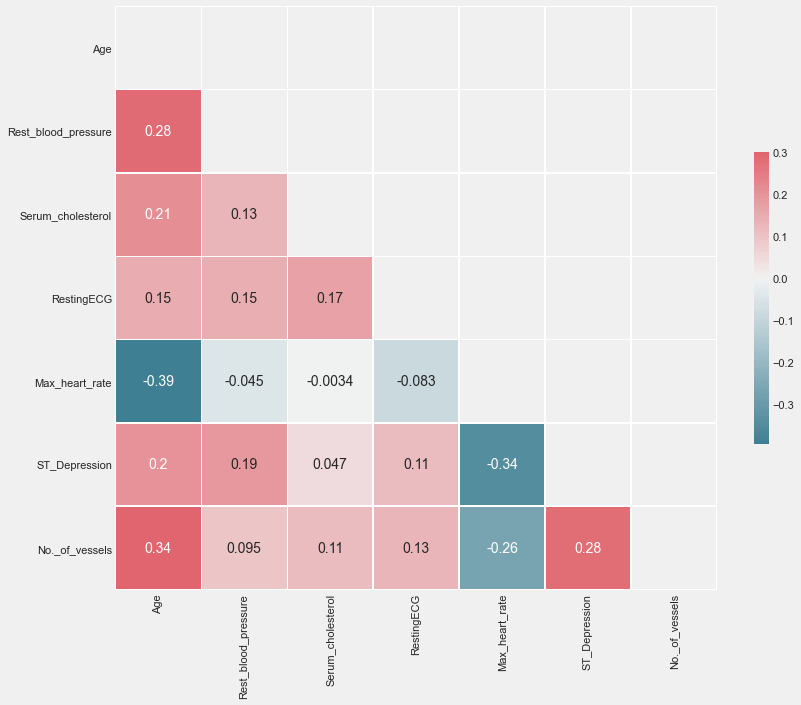

In [34]:
correl=df.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)

mask = np.zeros_like(correl,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax = plt.subplots(figsize=(12,10))

sns.heatmap(correl,mask=mask,cmap=cmap,vmax=0.3,center=0,annot=True,linewidths=0.5,cbar_kws={"shrink":.5});

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Rest_blood_pressure,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Serum_cholesterol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
RestingECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
Max_heart_rate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ST_Depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
No._of_vessels,303.0,0.683168,0.944808,0.0,0.0,0.0,1.0,3.0


# Data Cleaning:
    checking for missing values.Frist lets check it visually

In [36]:
import missingno as msno

<AxesSubplot:>

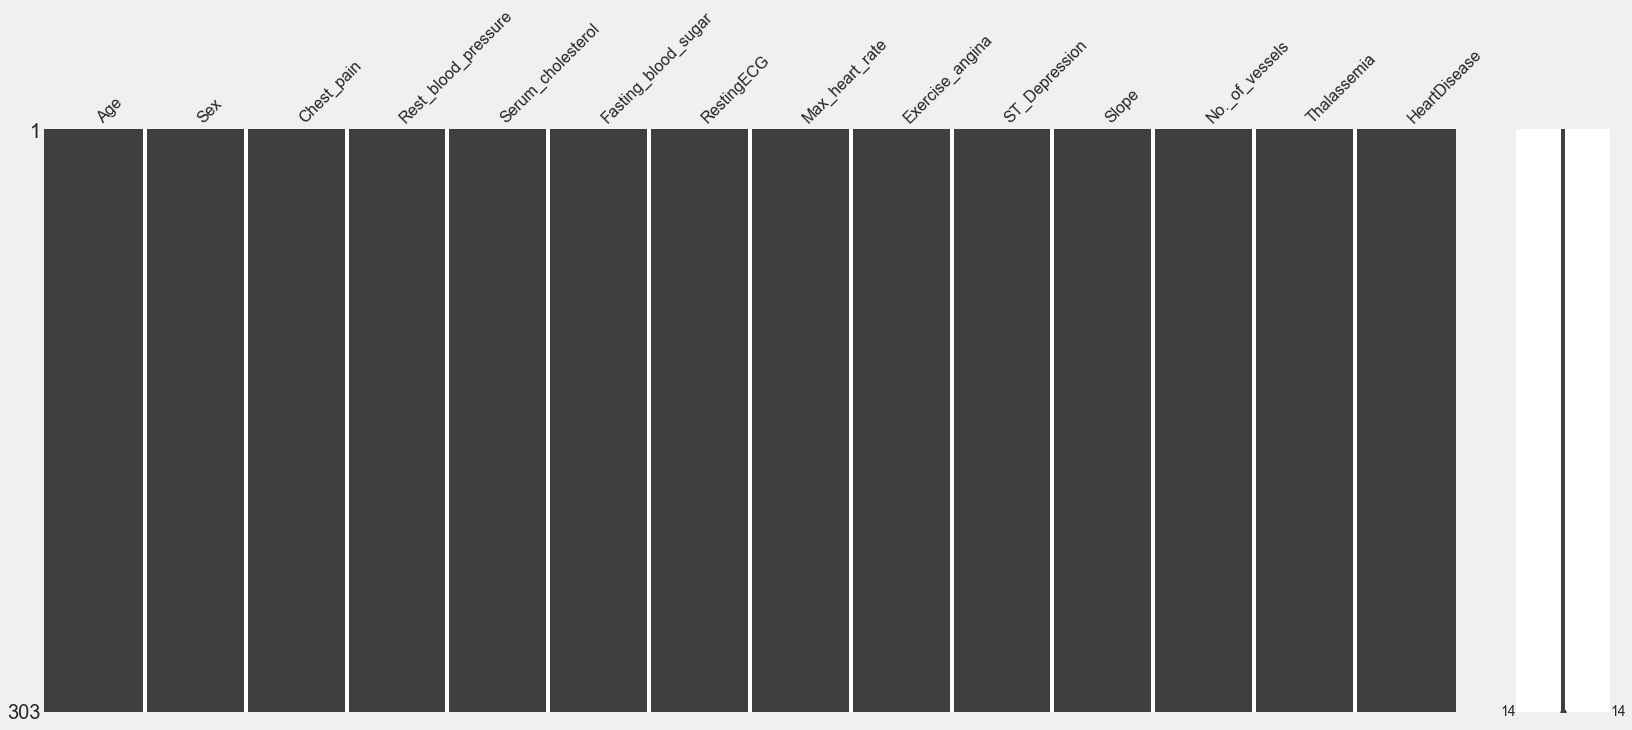

In [37]:
msno.matrix(df)

# Data Visualzation:

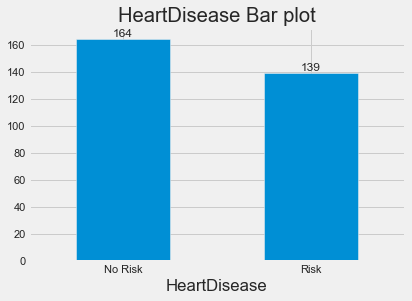

In [38]:
fig,ax=plt.subplots()
splot=df["HeartDisease"].value_counts().plot(kind='bar')
ax.set_title('HeartDisease Bar plot')
ax.set_xlabel("HeartDisease")
ax.set_xticklabels(['No Risk','Risk'],rotation=0)
for p in splot.patches:
    splot.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',size=12,xytext=(0,5),textcoords='offset points',rotation=0)

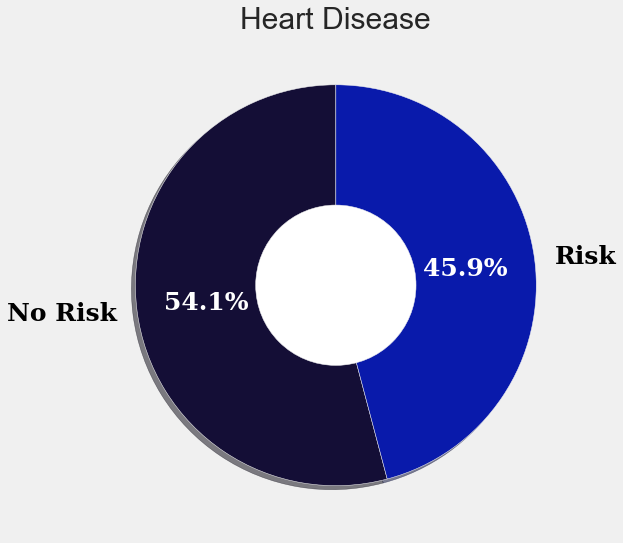

In [39]:
pie_colors=('#140E36', '#091AAB')
pred_classes= df.HeartDisease.value_counts()

plt.figure(figsize=(8,10))
patches,texts,pcts=plt.pie(pred_classes,
                          labels=['No Risk','Risk'],
                          colors=pie_colors,
                          pctdistance=0.65,
                          shadow=True,
                          startangle=90,
                          autopct='%1.1f%%',
                          textprops={'fontsize':25,
                                    'color':'black',
                                    'weight':'bold',
                                    'family':'serif'})
plt.setp(pcts,color='white')
plt.title('Heart Disease',size=30)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [40]:
#label Encoding
HeartDisease_dict={'No Risk':0,'Risk':1}
df['HeartDisease']=df['HeartDisease'].map(HeartDisease_dict)
df.head()

,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,Male,Typical,145,233,True,2,150,NO,2.3,Down,0.0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,2,108,Yes,1.5,Flat,3.0,Normal,1
2,67,Male,Asymptomatic,120,229,False,2,129,Yes,2.6,Flat,2.0,Irreviersible,1
3,37,Male,Nonanginal,130,250,False,0,187,NO,3.5,Down,0.0,Normal,0
4,41,Female,Atypical,130,204,False,2,172,NO,1.4,Up,0.0,Normal,0


# Exploratory Data Analysis 

In [41]:
from matplotlib.gridspec import GridSpec

colors = ['lightcoral','deepskyblue',
         'orchid','tomato',
         'teal','darkcyan',
         'limegreen','darkorange']

def distribution_plot(column,title):
    fig = plt.figure(figsize=(10,7))
    grid = GridSpec(nrows=2, ncols=1,figure=fig)
    color = np.random.choice(colors,1)[0]
    
    ax0=fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}', y=1.05)
    sns.histplot(column, ax=ax0,color=color)
    
    print(f'Skewness of {title} ======>>>{np.round(column.skew(),3)}')
    
    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1,color=color)

# Age

Skewness of Age ======>>>-0.209


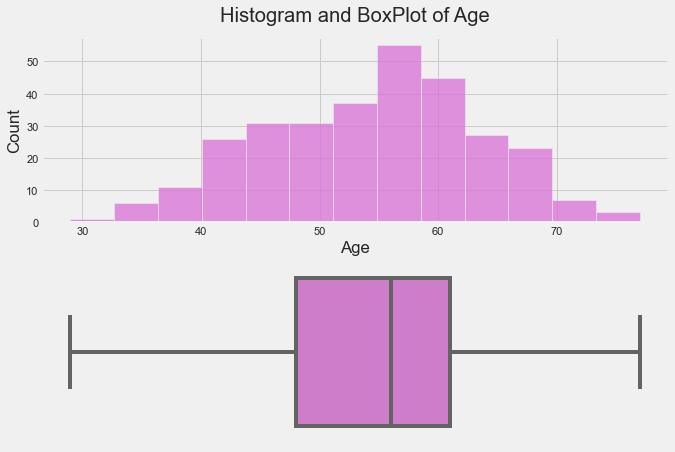

In [42]:
distribution_plot(df.Age,'Age')

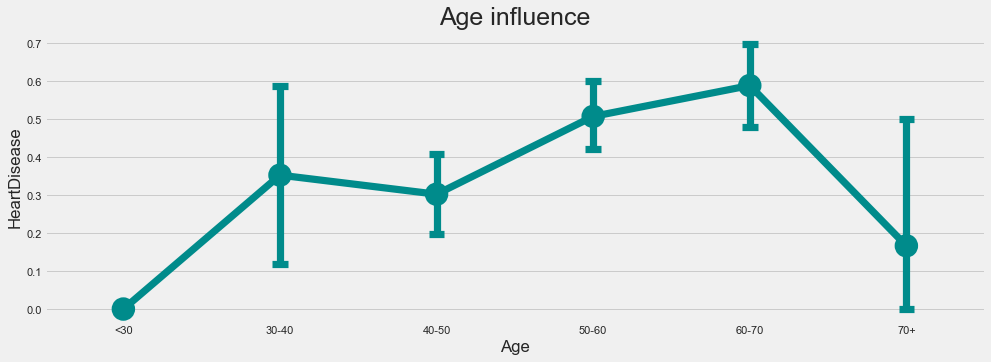

In [43]:
def age_plot(data,col_name):
    
    age_data = df[[col_name,'HeartDisease']]
    age_data[col_name] = pd.cut(age_data[col_name],
                               bins=[0,30,40,50,60,70,100],
                               labels=['<30',
                                      '30-40',
                                      '40-50',
                                      '50-60',
                                      '60-70',
                                      '70+'])
    color = np.random.choice(colors,1)[0]
    plt.figure(figsize=(15,5))
    sns.pointplot(x=col_name,y='HeartDisease',
                 dodge=0.1,capsize=0.1, data=age_data,color=color) \
                .set_title(f'{col_name} influence',fontsize=25)

age_plot(df,'Age')

# Checking Gender & Age Wise Distribution

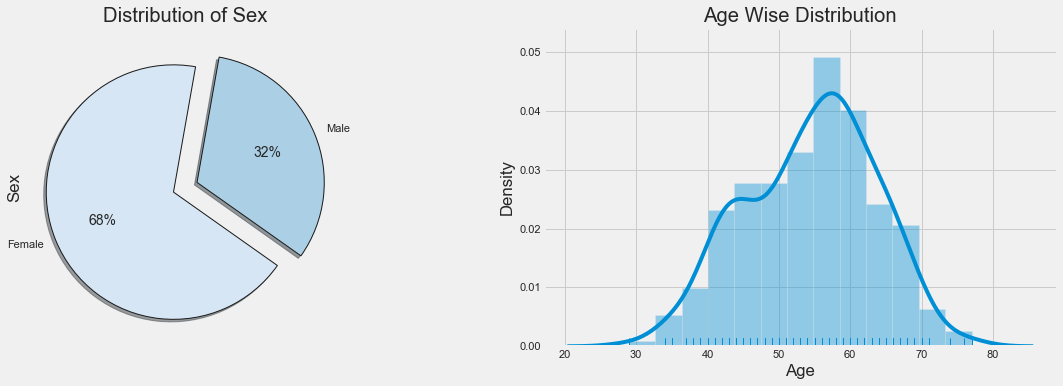

In [44]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['Sex'].value_counts().plot.pie(autopct="%1.0f%%",colors=sns.color_palette("Blues",5),startangle=80,labels=["Female","Male"],
                                 wedgeprops={"linewidth":1, "edgecolor":"k"},explode=[.1,.1],shadow=True)
plt.title("Distribution of Sex")
plt.subplot(222)
ax=sns.distplot(df['Age'],rug=True)
plt.title("Age Wise Distribution")
plt.show()

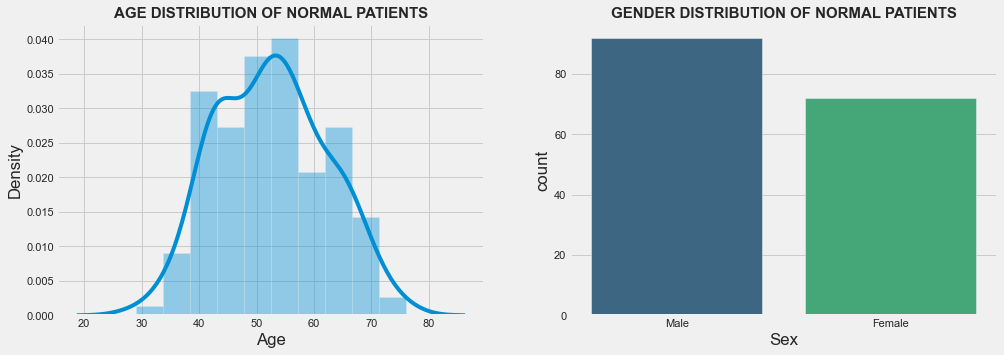

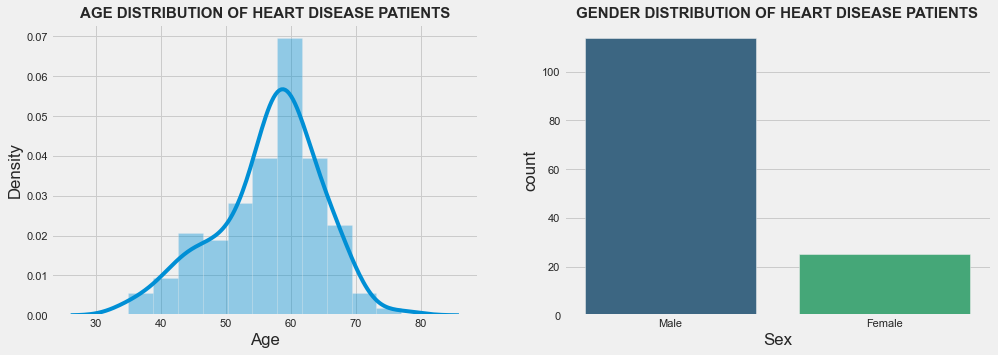

In [45]:
#creating separate df for normal and heart patients

attr_1 = df[df['HeartDisease']==1]#disease
attr_0 = df[df['HeartDisease']==0]#no disease

#plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS',fontsize=15,weight='bold')

ax1= plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['Sex'],palette='viridis')
#ax1.set_xticklabels(['Woman', 'Man'],rotation=0)
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS',fontsize=15,weight='bold')
plt.show()

#plotting heart patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['Age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS',fontsize=15,weight='bold')

ax1= plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Sex'],palette='viridis')
#ax1.set_xticklabels(['Woman', 'Man'],rotation=0)
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS',fontsize=15,weight='bold')
plt.show()

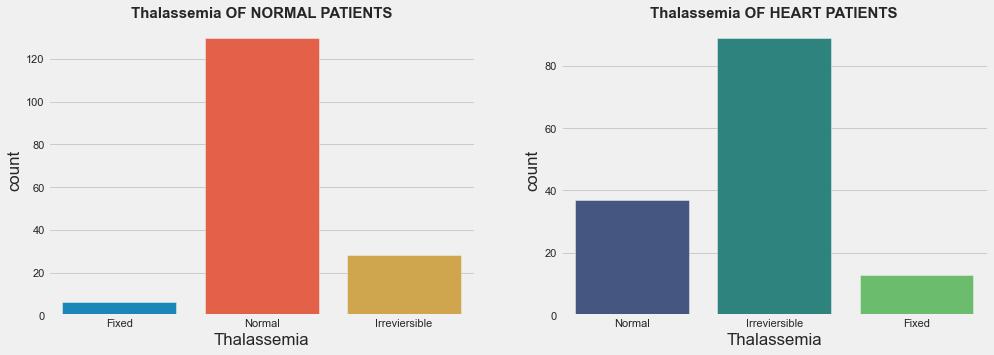

In [46]:
#plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Thalassemia'])
plt.title('Thalassemia OF NORMAL PATIENTS',fontsize=15,weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Thalassemia'],palette='viridis')
plt.title('Thalassemia OF HEART PATIENTS', fontsize=15,weight='bold')
plt.show()

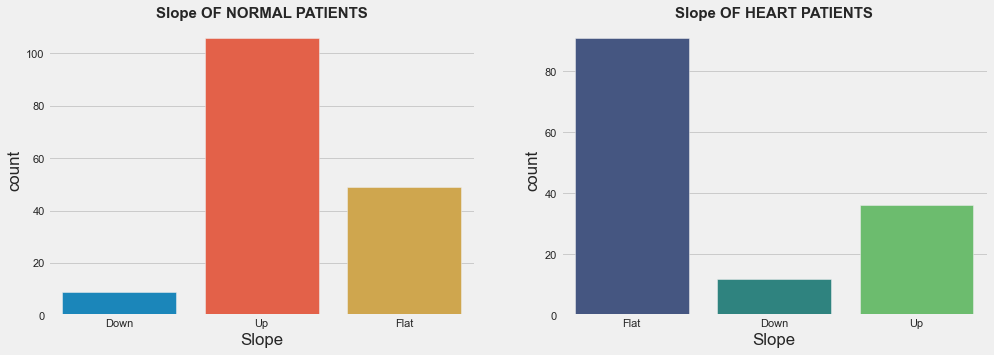

In [47]:
#plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Slope'])
plt.title('Slope OF NORMAL PATIENTS',fontsize=15,weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Slope'],palette='viridis')
plt.title('Slope OF HEART PATIENTS', fontsize=15,weight='bold')
plt.show()

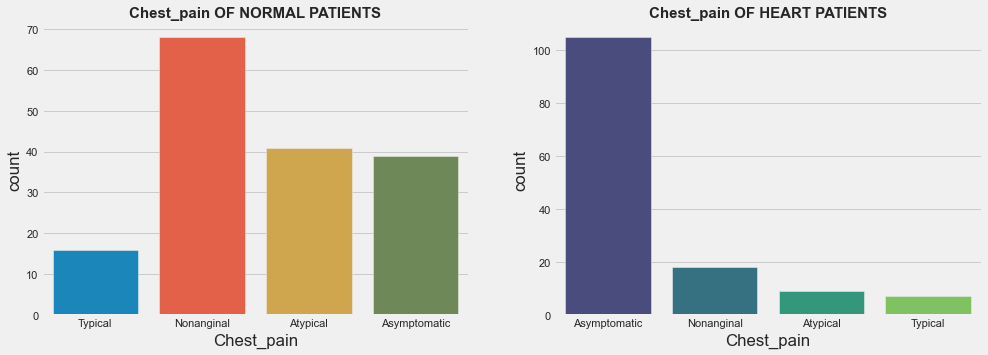

In [48]:
#plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Chest_pain'])
plt.title('Chest_pain OF NORMAL PATIENTS',fontsize=15,weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Chest_pain'],palette='viridis')
plt.title('Chest_pain OF HEART PATIENTS', fontsize=15,weight='bold')
plt.show()

In [49]:
#View information about our data
df.describe(include=[np.object]).T

,count,unique,top,freq
Sex,303,2,Male,206
Chest_pain,303,4,Asymptomatic,144
Fasting_blood_sugar,303,2,False,258
Exercise_angina,303,2,NO,204
Slope,303,3,Up,142
Thalassemia,303,3,Normal,167


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    int64  
 1   Sex                  303 non-null    object 
 2   Chest_pain           303 non-null    object 
 3   Rest_blood_pressure  303 non-null    int64  
 4   Serum_cholesterol    303 non-null    int64  
 5   Fasting_blood_sugar  303 non-null    object 
 6   RestingECG           303 non-null    int64  
 7   Max_heart_rate       303 non-null    int64  
 8   Exercise_angina      303 non-null    object 
 9   ST_Depression        303 non-null    float64
 10  Slope                303 non-null    object 
 11  No._of_vessels       303 non-null    float64
 12  Thalassemia          303 non-null    object 
 13  HeartDisease         303 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 33.3+ KB


# CHEST PAIN TYPE

<AxesSubplot:xlabel='Chest_pain', ylabel='HeartDisease'>

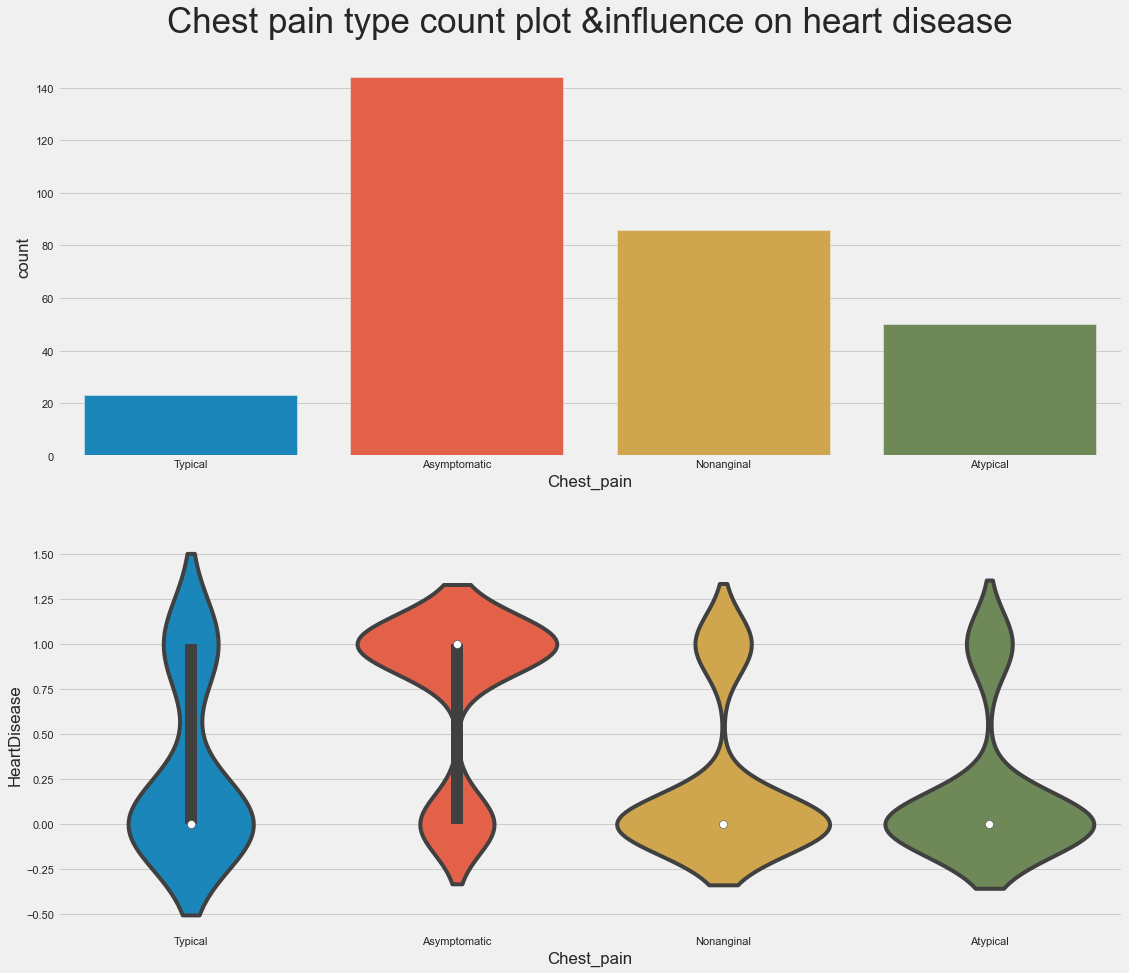

In [51]:
fig = plt.figure(figsize=(17,15))
grid=GridSpec(ncols=1,nrows=2,figure=fig)

ax1 = fig.add_subplot(grid[0, :])
pain_type_plot =sns.countplot(x=df.Chest_pain,ax=ax1)
pain_type_plot.set_title('Chest pain type count plot &'
                        'influence on heart disease',
                        fontsize=35,y=1.05)

ax2 = fig.add_subplot(grid[1,:])
sns.violinplot(x=df.Chest_pain,y='HeartDisease',data=df,ax=ax2)

Skewness of Resting Blood Pressure ======>>>0.706


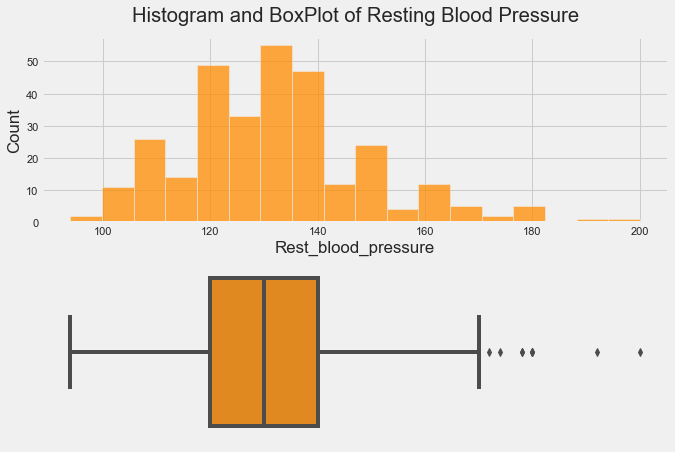

In [52]:
distribution_plot(df.Rest_blood_pressure,'Resting Blood Pressure')

In [53]:
minimal_pressure = df[df.Rest_blood_pressure<50]
minimal_pressure

,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease


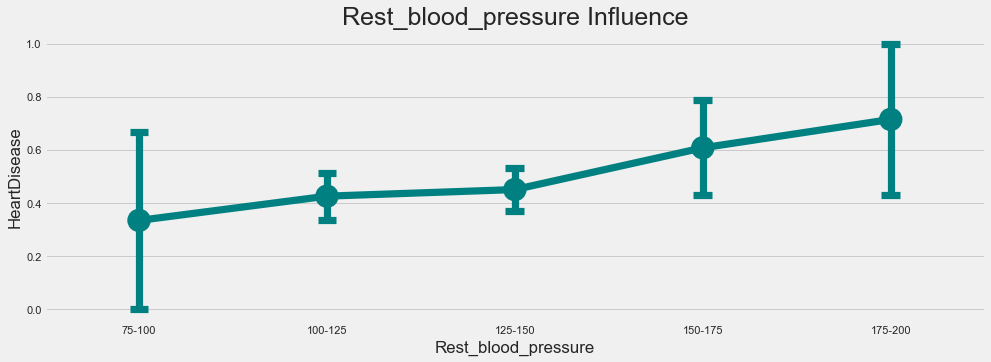

In [54]:
def pressure_plot(data,col_name):
    
    pressure_data = df[[col_name, 'HeartDisease']]
    pressure_data[col_name] = pd.cut(pressure_data[col_name],
                                    bins=[75,100,125,150,175,200],
                                    labels=['75-100',
                                           '100-125',
                                           '125-150',
                                           '150-175',
                                           '175-200'])
    color=np.random.choice(colors,1)[0]
    plt.figure(figsize=(15,5))
    sns.pointplot(x=col_name,y='HeartDisease',
                 dodge=0.1,capsize=.1,data=pressure_data,color=color)\
                .set_title(f'{col_name} Influence',fontsize=25)

pressure_plot(df,'Rest_blood_pressure')

Skewness of Serum_cholesterol ======>>>1.136


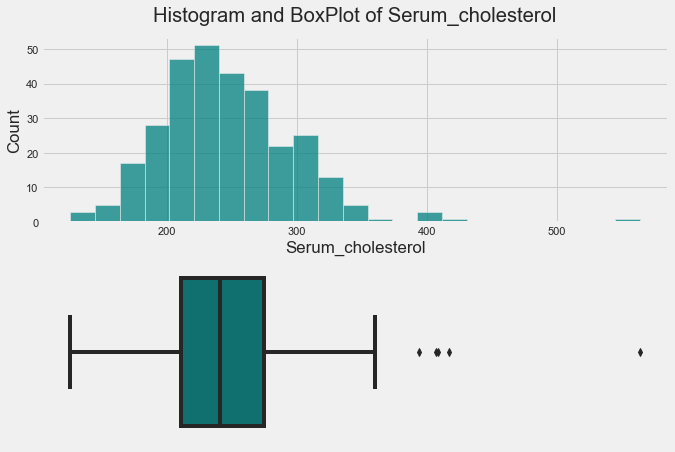

In [55]:
distribution_plot(df.Serum_cholesterol,'Serum_cholesterol')

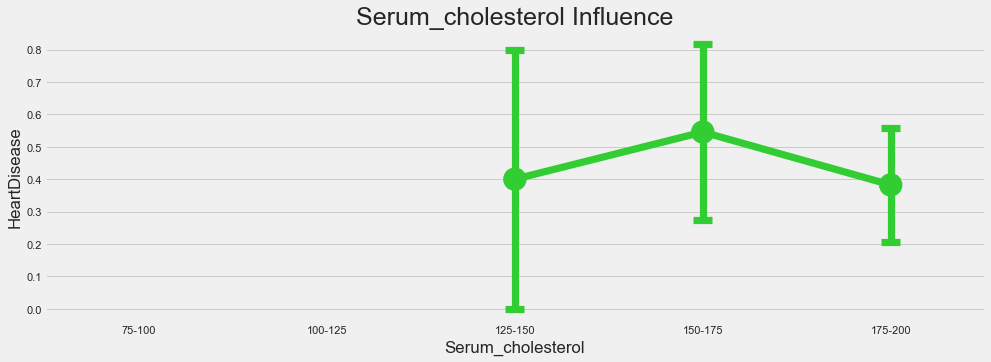

In [56]:
def Serum_cholesterol(data,col_name):
    
    cholesterol_data = df[[col_name, 'HeartDisease']]
    cholesterol_data[col_name] = pd.cut(cholesterol_data[col_name],
                                    bins=[0,150,200,250,300,350,400,1000],
                                    labels=['0-150',
                                           '150-200',
                                           '200-250',
                                           '250-300',
                                           '300-350',
                                           '350-400',
                                           '400+'])
    color=np.random.choice(colors,1)[0]
    plt.figure(figsize=(15,5))
    sns.pointplot(x=col_name,y='HeartDisease',
                 dodge=0.1,capsize=.1,data=cholesterol_data,color=color)\
                .set_title(f'{col_name} Influence',fontsize=25)

pressure_plot(df,'Serum_cholesterol')

[Text(0, 0, 'True>120'), Text(1, 0, 'False')]

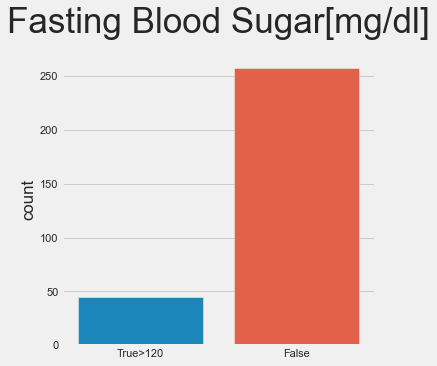

In [57]:
#Fasting Blood Sugar
plt.figure(figsize=(5,5))
active_plot = sns.countplot(x=df.Fasting_blood_sugar)
active_plot.set_title('Fasting Blood Sugar[mg/dl]',fontsize=35,y=1.05)
active_plot.set(xlabel=None)
active_plot.set_xticklabels(['True>120','False'])

Text(0.5, 1.05, 'Blood Sugar Effect')

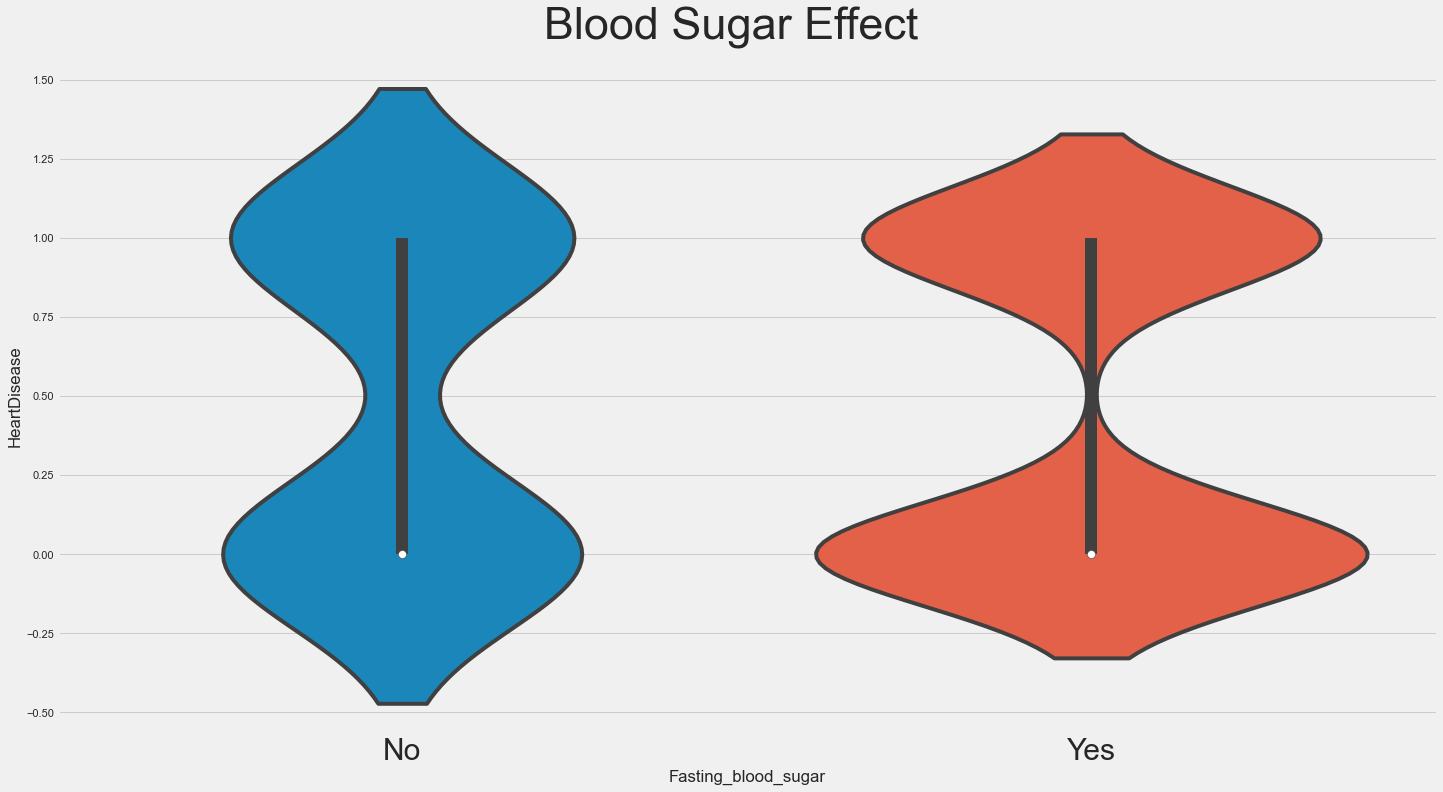

In [58]:
sugar_plot = sns.catplot(x='Fasting_blood_sugar',y='HeartDisease',data=df,height=10,aspect=2,kind='violin')
sugar_plot.set_xticklabels(['No','Yes'],size=30)
sugar_plot.fig.suptitle('Blood Sugar Effect', size=45,y=1.05)

Skewness of Maximum heart rate ======>>>-0.537


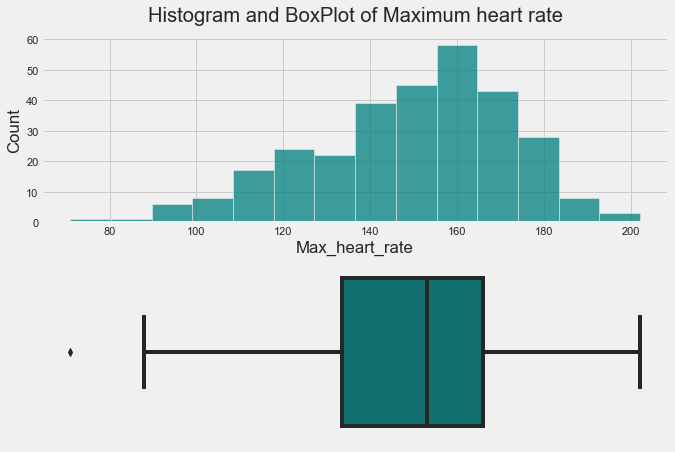

In [59]:
distribution_plot(df.Max_heart_rate,'Maximum heart rate')

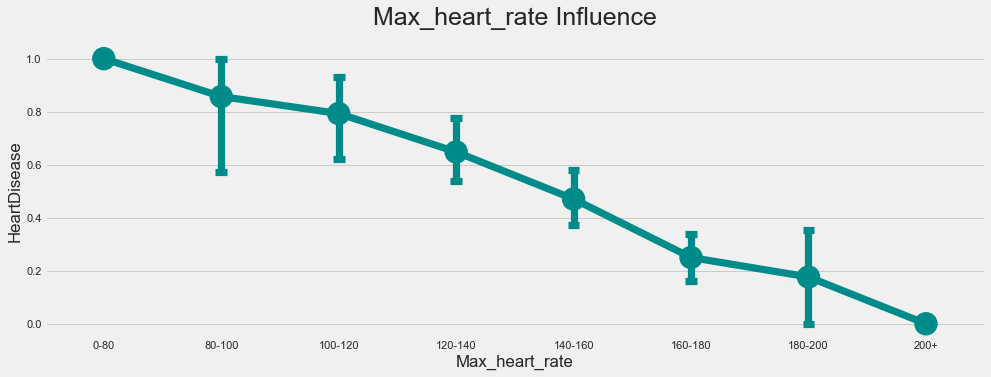

In [60]:
def max_hr_plot(data,col_name):
    max_hr_data=df[[col_name,'HeartDisease']]
    max_hr_data[col_name] = pd.cut(max_hr_data[col_name],
                                  bins=[0,80,100,120,140,160,180,200,1000],
                                  labels=['0-80',
                                         '80-100',
                                         '100-120',
                                         '120-140',
                                         '140-160',
                                         '160-180',
                                         '180-200',
                                         '200+'])
    color=np.random.choice(colors,1)[0]
    plt.figure(figsize=(15,5))
    sns.pointplot(x=col_name,y='HeartDisease',
                 dodge=0.1,capsize=.1,data=max_hr_data,color=color)\
                .set_title(f'{col_name} Influence', fontsize=25, y=1.05)
    
max_hr_plot(df,'Max_heart_rate')

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

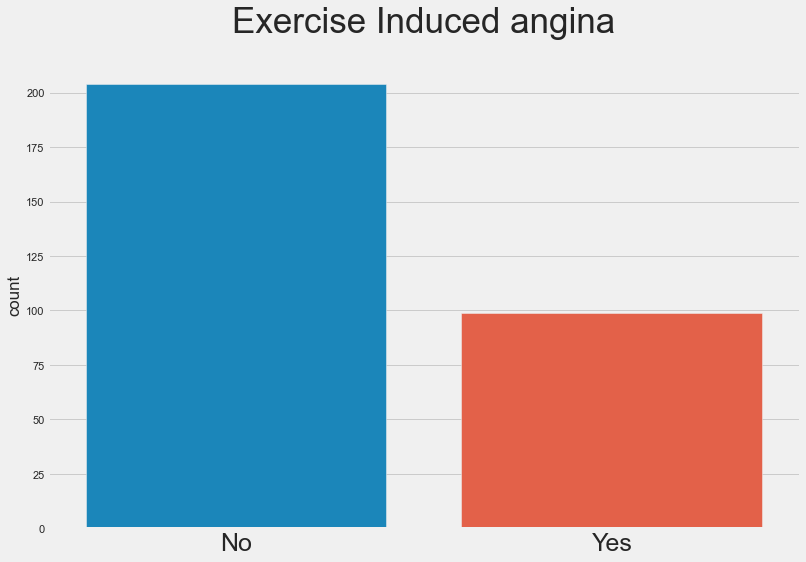

In [61]:
plt.figure(figsize=(12,8))
exercise_angina_plot = sns.countplot(x=df.Exercise_angina)
exercise_angina_plot.set_title('Exercise Induced angina',fontsize=35,y=1.05)
exercise_angina_plot.set(xlabel=None)
exercise_angina_plot.set_xticklabels(['No','Yes'], size=25)

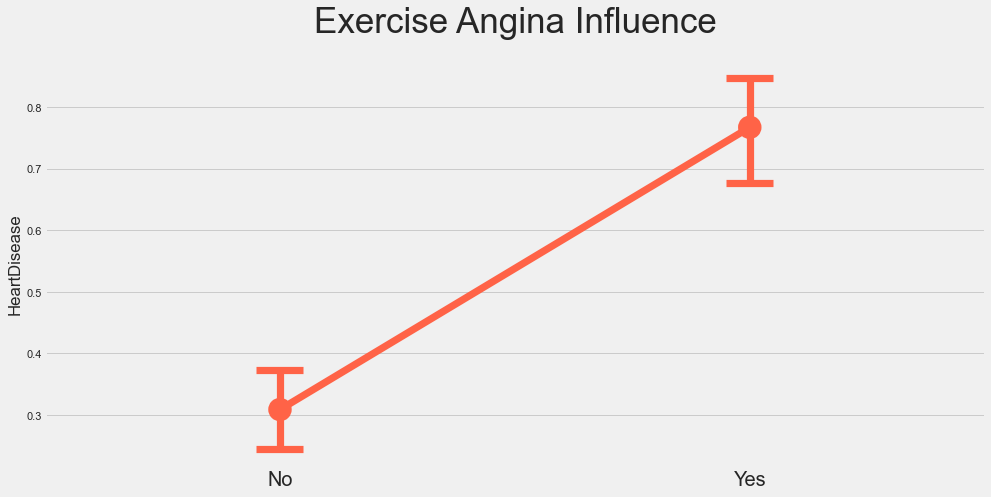

In [62]:
def angina_plot(data,col_name):
    
    angina_data = df[[col_name,'HeartDisease']]
    
    color = np.random.choice(colors,1)[0]
    plt.figure(figsize=(15,7))
    angina = sns.pointplot(x=col_name, y='HeartDisease',
                          dodge=0.1,capsize=0.1,data=angina_data,
                          color=color)
    
    angina.set_title('Exercise Angina Influence',
                    fontsize=35,y=1.05)
    angina.set(xlabel=None)
    angina.set_xticklabels(['No','Yes'],size=20)

angina_plot(df,'Exercise_angina')

Skewness of ST_Depression ======>>>1.27


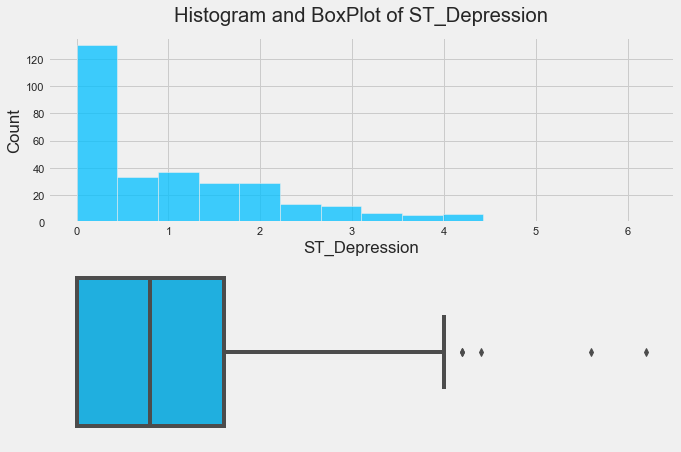

In [63]:
distribution_plot(df.ST_Depression,'ST_Depression')

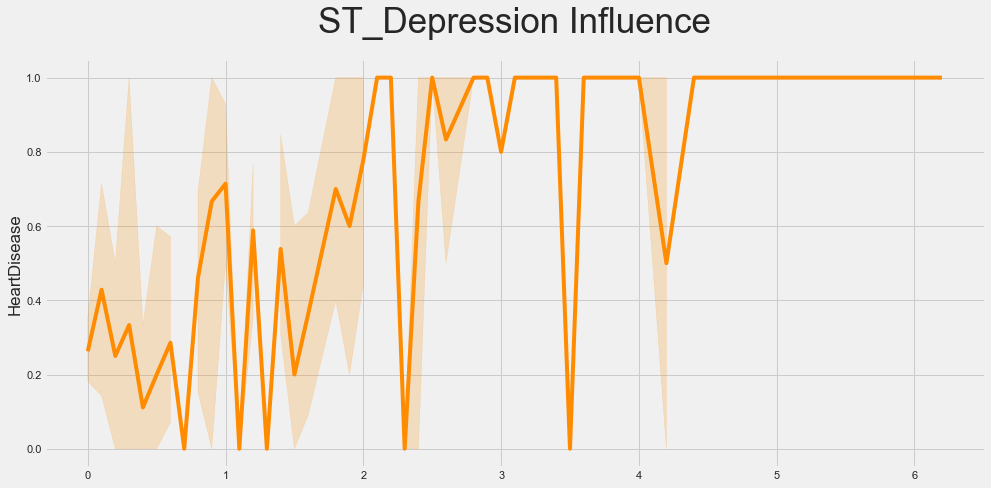

In [64]:
def oldpeak_plot(data,col_name):
    
    oldpeak_data = df[[col_name,'HeartDisease']]
    
    color = np.random.choice(colors,1)[0]
    plt.figure(figsize=(15,7))
    oldpeak = sns.lineplot(x=col_name, y='HeartDisease',
                          data=oldpeak_data,color=color)
    
    oldpeak.set_title('ST_Depression Influence',
                    fontsize=35,y=1.05)
    oldpeak.set(xlabel=None)
   

oldpeak_plot(df,'ST_Depression')

[None, None, None, None, None, None]

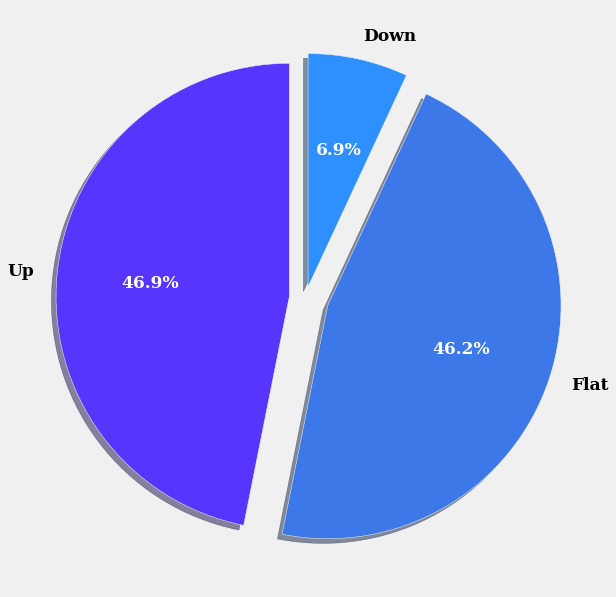

In [65]:
st_slope_data=df.Slope.value_counts()

explode=(0.07,0.1,0.05)
pie_colors=('#5735FD','#3C78E8','#2E90FF')

plt.figure(figsize=(10,10))
patches,texts,pcts = plt.pie(st_slope_data,labels=st_slope_data.index,
                            explode=explode,colors=pie_colors,
                            shadow=True,
                            startangle=90,
                            autopct='%1.1f%%',
                            textprops={'fontsize':17,
                                      'color':'black',
                                      'weight':'bold',
                                      'family':'serif'})

plt.setp(pcts,color='white')

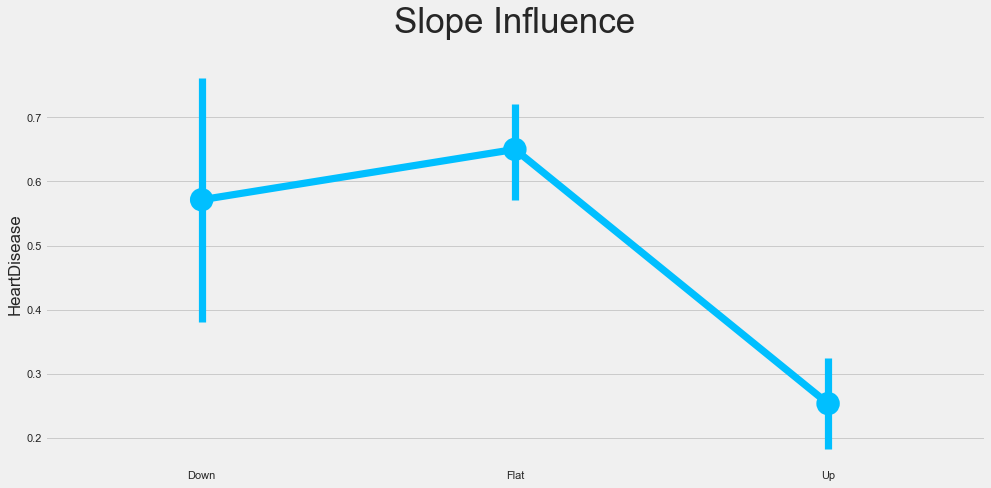

In [66]:
def Slope_plot(data,col_name):
    
    Slope_data = df[[col_name,'HeartDisease']]
    
    color = np.random.choice(colors,1)[0]
    plt.figure(figsize=(15,7))
    Slopepeak = sns.pointplot(x=col_name, y='HeartDisease',
                          data=Slope_data,color=color)
    
    Slopepeak.set_title('Slope Influence',
                    fontsize=35,y=1.05)
    Slopepeak.set(xlabel=None)
   

Slope_plot(df,'Slope')

# Outlier Detection & Removal:

Text(0.5, 1.0, 'No._of_vessels')

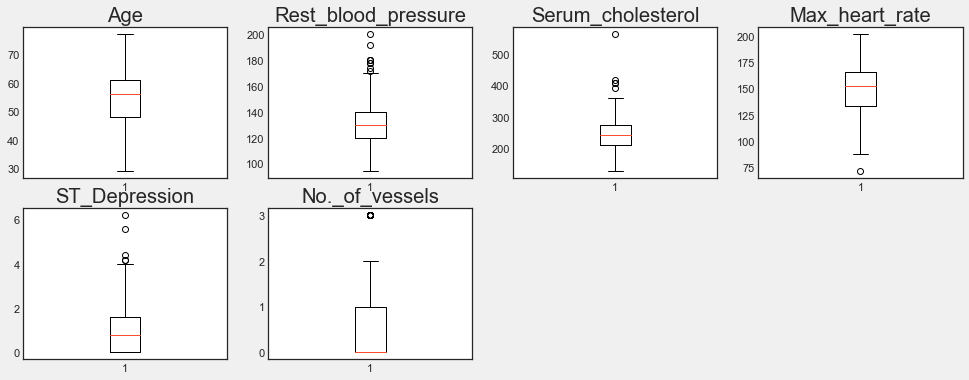

In [67]:
plt.figure(figsize=(15,15))
plt.style.use('seaborn-white')

ax1=plt.subplot2grid((5,4),(0,0))
plt.boxplot(df['Age'])
ax1.set_title('Age')

ax2=plt.subplot2grid((5,4),(0,1))
plt.boxplot(df['Rest_blood_pressure'])
ax2.set_title('Rest_blood_pressure')

ax3=plt.subplot2grid((5,4),(0,2))
plt.boxplot(df['Serum_cholesterol'])
ax3.set_title('Serum_cholesterol')

ax4=plt.subplot2grid((5,4),(0,3))
plt.boxplot(df['Max_heart_rate'])
ax4.set_title('Max_heart_rate')

ax5=plt.subplot2grid((5,4),(1,0))
plt.boxplot(df['ST_Depression'])
ax5.set_title('ST_Depression')

ax6=plt.subplot2grid((5,4),(1,1))
plt.boxplot(df['No._of_vessels'])
ax6.set_title('No._of_vessels')

In [68]:
#Age
q1 = np.percentile(df['Age'],25)
q3 = np.percentile(df['Age'],75)
IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['Age']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
print('Identified outliers: %d' % len(outlier))       

Identified outliers: 0


In [69]:
#Rest_blood_pressure
q1 = np.percentile(df['Rest_blood_pressure'],25)
q3 = np.percentile(df['Rest_blood_pressure'],75)
IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['Rest_blood_pressure']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
print('Identified outliers: %d' % len(outlier))       


median = df['Rest_blood_pressure'].median()
median
for iten in outlier:
     df['Rest_blood_pressure'][df['Rest_blood_pressure']==iten] = median
df.head()

Identified outliers: 9


,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,Male,Typical,145,233,True,2,150,NO,2.3,Down,0.0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,2,108,Yes,1.5,Flat,3.0,Normal,1
2,67,Male,Asymptomatic,120,229,False,2,129,Yes,2.6,Flat,2.0,Irreviersible,1
3,37,Male,Nonanginal,130,250,False,0,187,NO,3.5,Down,0.0,Normal,0
4,41,Female,Atypical,130,204,False,2,172,NO,1.4,Up,0.0,Normal,0


In [70]:
#Serum_cholesterol
q1 = np.percentile(df['Serum_cholesterol'],25)
q3 = np.percentile(df['Serum_cholesterol'],75)
IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['Serum_cholesterol']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
print('Identified outliers: %d' % len(outlier))       


median = df['Serum_cholesterol'].median()
median
for iten in outlier:
     df['Serum_cholesterol'][df['Serum_cholesterol']==iten] = median
df.head()

Identified outliers: 5


,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,Male,Typical,145,233,True,2,150,NO,2.3,Down,0.0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,2,108,Yes,1.5,Flat,3.0,Normal,1
2,67,Male,Asymptomatic,120,229,False,2,129,Yes,2.6,Flat,2.0,Irreviersible,1
3,37,Male,Nonanginal,130,250,False,0,187,NO,3.5,Down,0.0,Normal,0
4,41,Female,Atypical,130,204,False,2,172,NO,1.4,Up,0.0,Normal,0


In [71]:
#Max_heart_rate
q1 = np.percentile(df['Max_heart_rate'],25)
q3 = np.percentile(df['Max_heart_rate'],75)
IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['Max_heart_rate']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
print('Identified outliers: %d' % len(outlier))       


median = df['Max_heart_rate'].median()
median
for iten in outlier:
     df['Max_heart_rate'][df['Max_heart_rate']==iten] = median
df.head()

Identified outliers: 1


,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,Male,Typical,145,233,True,2,150,NO,2.3,Down,0.0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,2,108,Yes,1.5,Flat,3.0,Normal,1
2,67,Male,Asymptomatic,120,229,False,2,129,Yes,2.6,Flat,2.0,Irreviersible,1
3,37,Male,Nonanginal,130,250,False,0,187,NO,3.5,Down,0.0,Normal,0
4,41,Female,Atypical,130,204,False,2,172,NO,1.4,Up,0.0,Normal,0


In [72]:
#ST_Depression
q1 = np.percentile(df['ST_Depression'],25)
q3 = np.percentile(df['ST_Depression'],75)
IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['ST_Depression']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
print('Identified outliers: %d' % len(outlier))       


median = df['ST_Depression'].median()
median
for iten in outlier:
     df['ST_Depression'][df['ST_Depression']==iten] = median
df.head()

Identified outliers: 5


,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,Male,Typical,145,233,True,2,150,NO,2.3,Down,0.0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,2,108,Yes,1.5,Flat,3.0,Normal,1
2,67,Male,Asymptomatic,120,229,False,2,129,Yes,2.6,Flat,2.0,Irreviersible,1
3,37,Male,Nonanginal,130,250,False,0,187,NO,3.5,Down,0.0,Normal,0
4,41,Female,Atypical,130,204,False,2,172,NO,1.4,Up,0.0,Normal,0


In [73]:
#ST_Depression
q1 = np.percentile(df['No._of_vessels'],25)
q3 = np.percentile(df['No._of_vessels'],75)
IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['No._of_vessels']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
print('Identified outliers: %d' % len(outlier))       


median = df['No._of_vessels'].median()
median
for iten in outlier:
     df['No._of_vessels'][df['No._of_vessels']==iten] = median
df.head()

Identified outliers: 21


,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,Male,Typical,145,233,True,2,150,NO,2.3,Down,0.0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,2,108,Yes,1.5,Flat,0.0,Normal,1
2,67,Male,Asymptomatic,120,229,False,2,129,Yes,2.6,Flat,2.0,Irreviersible,1
3,37,Male,Nonanginal,130,250,False,0,187,NO,3.5,Down,0.0,Normal,0
4,41,Female,Atypical,130,204,False,2,172,NO,1.4,Up,0.0,Normal,0


Text(0.5, 1.0, 'No._of_vessels')

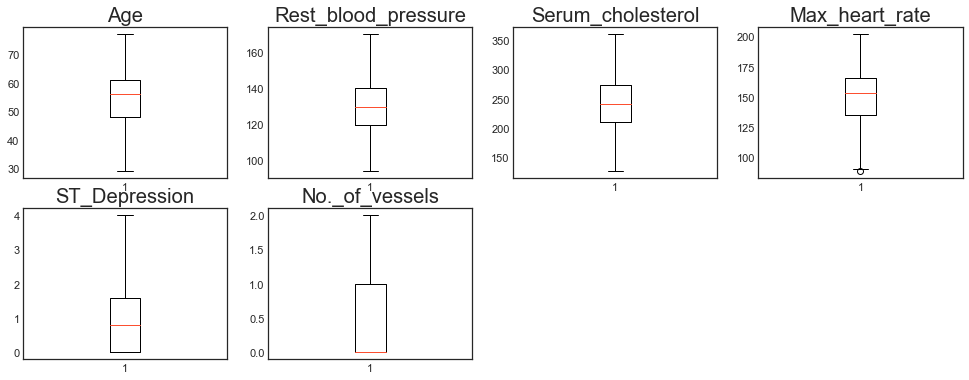

In [74]:
plt.figure(figsize=(15,15))
plt.style.use('seaborn-white')

ax1=plt.subplot2grid((5,4),(0,0))
plt.boxplot(df['Age'])
ax1.set_title('Age')

ax2=plt.subplot2grid((5,4),(0,1))
plt.boxplot(df['Rest_blood_pressure'])
ax2.set_title('Rest_blood_pressure')

ax3=plt.subplot2grid((5,4),(0,2))
plt.boxplot(df['Serum_cholesterol'])
ax3.set_title('Serum_cholesterol')

ax4=plt.subplot2grid((5,4),(0,3))
plt.boxplot(df['Max_heart_rate'])
ax4.set_title('Max_heart_rate')

ax5=plt.subplot2grid((5,4),(1,0))
plt.boxplot(df['ST_Depression'])
ax5.set_title('ST_Depression')

ax6=plt.subplot2grid((5,4),(1,1))
plt.boxplot(df['No._of_vessels'])
ax6.set_title('No._of_vessels')

# Lets print values in object columns to see data values:

In [75]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print({column:df[column].unique()})
            
print_unique_col_values(df)

{'Sex': array(['Male', 'Female'], dtype=object)}
{'Chest_pain': array(['Typical', 'Asymptomatic', 'Nonanginal', 'Atypical'], dtype=object)}
{'Fasting_blood_sugar': array(['True', 'False'], dtype=object)}
{'Exercise_angina': array(['NO', 'Yes'], dtype=object)}
{'Slope': array(['Down', 'Flat', 'Up'], dtype=object)}
{'Thalassemia': array(['Fixed', 'Normal', 'Irreviersible'], dtype=object)}


# coding categorical data

In [76]:
from sklearn import preprocessing
cat_columns = [cname for cname in df.columns 
                              if df[cname].dtype=='object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

In [77]:
df.head(10)

,Age,Sex,Chest_pain,Rest_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,RestingECG,Max_heart_rate,Exercise_angina,ST_Depression,Slope,No._of_vessels,Thalassemia,HeartDisease
0,63,1,3,145,233,1,2,150,0,2.3,0,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,1,0.0,2,1
2,67,1,0,120,229,0,2,129,1,2.6,1,2.0,1,1
3,37,1,2,130,250,0,0,187,0,3.5,0,0.0,2,0
4,41,0,1,130,204,0,2,172,0,1.4,2,0.0,2,0
5,56,1,1,120,236,0,0,178,0,0.8,2,0.0,2,0
6,62,0,0,140,268,0,2,160,0,3.6,0,2.0,2,1
7,57,0,0,120,354,0,0,163,1,0.6,2,0.0,2,0
8,63,1,0,130,254,0,2,147,0,1.4,1,1.0,1,1
9,53,1,0,140,203,1,2,155,1,3.1,0,0.0,1,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    int64  
 1   Sex                  303 non-null    int64  
 2   Chest_pain           303 non-null    int64  
 3   Rest_blood_pressure  303 non-null    int64  
 4   Serum_cholesterol    303 non-null    int64  
 5   Fasting_blood_sugar  303 non-null    int64  
 6   RestingECG           303 non-null    int64  
 7   Max_heart_rate       303 non-null    int64  
 8   Exercise_angina      303 non-null    int64  
 9   ST_Depression        303 non-null    float64
 10  Slope                303 non-null    int64  
 11  No._of_vessels       303 non-null    float64
 12  Thalassemia          303 non-null    int64  
 13  HeartDisease         303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


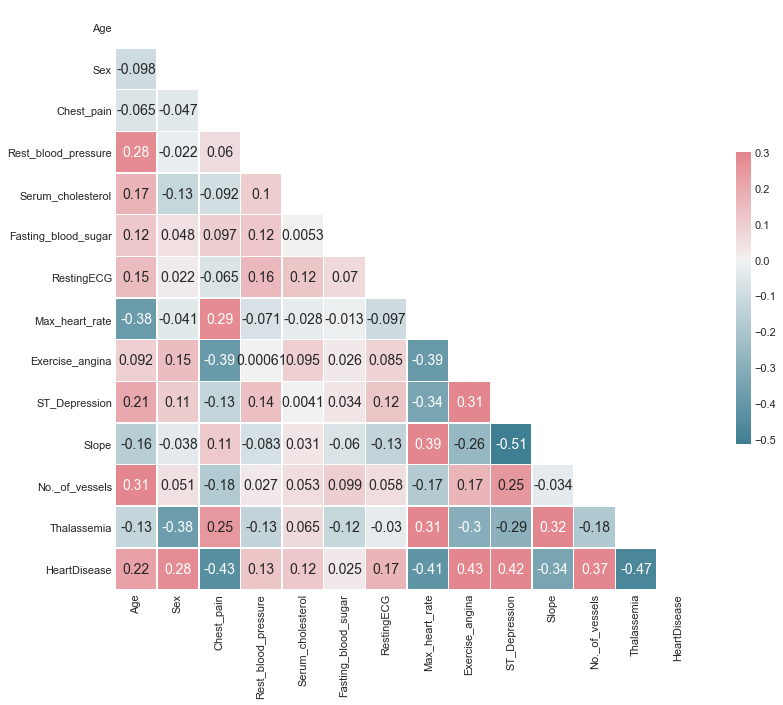

In [79]:
#Maltivariate Analysis & Correlation Detection
correl = df.corr()
cmap=sns.diverging_palette(220,10,as_cmap=True)

mask=np.zeros_like(correl,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize =(12,10))

sns.heatmap(correl,mask=mask,cmap=cmap,vmax=0.3,center=0,annot=True,square=True,linewidths =0.5,cbar_kws = {"shrink":.5});

# Feature Scaling:

In [80]:
cols_to_scale=['Age','Sex','Chest_pain','Rest_blood_pressure','Serum_cholesterol','Fasting_blood_sugar','RestingECG','Max_heart_rate','Exercise_angina','ST_Depression','Slope','No._of_vessels','Thalassemia']
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [81]:
for col in df:
    print({col: df[col].unique()})

{'Age': array([0.70833333, 0.79166667, 0.16666667, 0.25      , 0.5625    ,
       0.6875    , 0.58333333, 0.5       , 0.3125    , 0.47916667,
       0.39583333, 0.52083333, 0.41666667, 0.72916667, 0.60416667,
       0.64583333, 0.4375    , 0.77083333, 0.29166667, 0.22916667,
       0.83333333, 0.625     , 0.27083333, 0.54166667, 0.66666667,
       0.75      , 0.875     , 0.45833333, 0.35416667, 0.33333333,
       0.20833333, 0.8125    , 0.375     , 0.10416667, 0.125     ,
       0.        , 0.85416667, 1.        , 0.1875    , 0.9375    ,
       0.97916667])}
{'Sex': array([1., 0.])}
{'Chest_pain': array([1.        , 0.        , 0.66666667, 0.33333333])}
{'Rest_blood_pressure': array([0.67105263, 0.86842105, 0.34210526, 0.47368421, 0.60526316,
       0.73684211, 0.21052632, 0.5       , 0.30263158, 0.53947368,
       0.23684211, 0.14473684, 0.39473684, 0.40789474, 0.63157895,
       0.44736842, 1.        , 0.80263158, 0.13157895, 0.57894737,
       0.18421053, 0.52631579, 0.36842105, 0.2

# Train_Test_Split:

In [82]:
#Segregating dataset into feature ....X and HeartDisease  variables i.e....y
X=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

<AxesSubplot:title={'center':'Correlation with Disease'}>

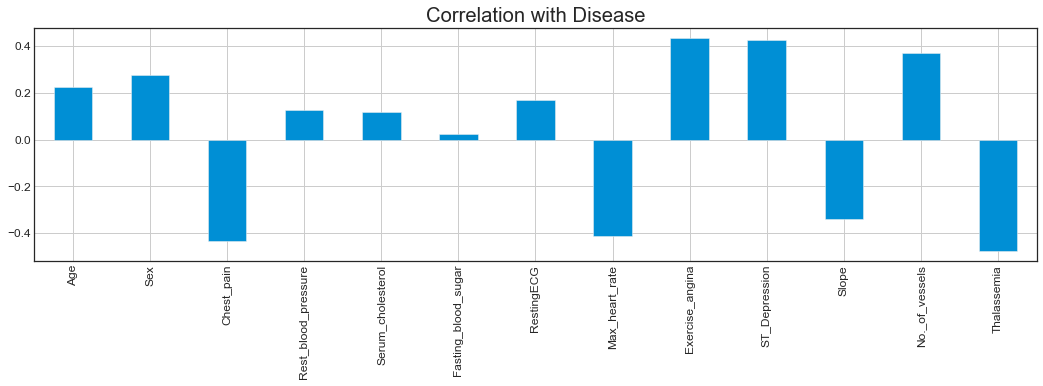

In [83]:
#Correlation with Response Variable class
X.corrwith(y).plot.bar(
        figsize=(16,4),title="Correlation with Disease", fontsize=12,rot=90,grid=True)

In [84]:
y.value_counts()

0    164
1    139
Name: HeartDisease, dtype: int64

In [85]:
#Smote for Balancing Data
from imblearn.over_sampling import ADASYN
smote =ADASYN()
X_sm,y_sm =smote.fit_resample(X,y)

In [86]:
 y_sm.value_counts()

0    164
1    149
Name: HeartDisease, dtype: int64

In [87]:
#Train_Test_split ->,
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,stratify=y_sm,test_size=0.15,shuffle=True,random_state=30)

In [88]:
print("Input Training",X_train.shape)
print("Input Test",X_test.shape)
print("="*30)
print("Output Training",y_train.shape)
print("Output Test",y_test.shape)

Input Training (266, 13)
Input Test (47, 13)
Output Training (266,)
Output Test (47,)


# Buliding Different Models:

In [89]:
#KNN
knn =KNN()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

#DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)

#RandomForestClassifier
rtree=RandomForestClassifier(n_estimators=100,random_state=10,criterion='entropy',max_depth=10,
                            max_features='log2')
rtree.fit(X_train,y_train)
y_pred_rtree=rtree.predict(X_test)
#SVC
svm=SVC(probability=True)
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

import xgboost as xgb
#XGBClassifier
xgb=xgb.XGBClassifier(probability=True)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

#MLPClassifier
Mlp=MLPClassifier()
Mlp.fit(X_train,y_train)
y_pred_mlp=Mlp.predict(X_test)

[00:17:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { probability } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:17:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,TPR,FPR,FNR,MAE,MSE,RMSE,Precision,Sensitivity,specificity,F1 Score,ROC,Recall,Log_Loss,mathew_corrcoef,kappa
0,KNN,82.98,72.73,8.0,27.27,17.02,17.02,4.13,88.89,72.73,92.0,80.0,82.36,72.73,5.88,66.44,65.44


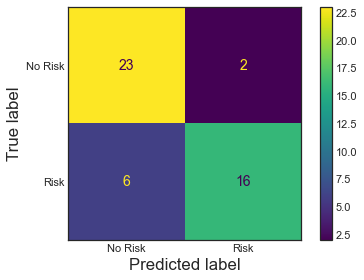

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=['No Risk','Risk']
CM=confusion_matrix(y_test,y_pred_knn)
ConfusionMatrixDisplay(CM,display_labels=labels).plot()

TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]

TPR=round(TP/(TP+FN)*100,2)
FPR=round(FP/(FP+TN)*100,2)
FNR=round(FN/(TP+FN)*100,2)
senstivity= round(TP/(FN+TP)*100,2)
specificity = round(TN/(TN+FP)*100,2)
loss_log = round(log_loss(y_test,y_pred_knn),2)
acc=round(accuracy_score(y_test,y_pred_knn)*100,2)
roc=round(roc_auc_score(y_test,y_pred_knn)*100,2)
prec=round(precision_score(y_test,y_pred_knn)*100,2)
rec=round(recall_score(y_test,y_pred_knn)*100,2)
f1=round(f1_score(y_test,y_pred_knn)*100,2)
kappa1=round(cohen_kappa_score(y_test,y_pred_knn)*100,2)
mathew = round(matthews_corrcoef(y_test,y_pred_knn)*100,2)

mae = round(mean_absolute_error(y_test,y_pred_knn)*100,2)
mse = round(mean_squared_error(y_test,y_pred_knn)*100,2)
rmse = round(np.sqrt(mse),2)

model_results =pd.DataFrame([['KNN',acc,TPR,FPR,FNR,mae,mse,rmse,prec,senstivity,specificity,f1,roc,rec,loss_log,mathew,kappa1]],
                           columns=['Model','Accuracy','TPR','FPR','FNR','MAE','MSE','RMSE','Precision','Sensitivity','specificity','F1 Score','ROC','Recall','Log_Loss','mathew_corrcoef','kappa'])

model_results

In [91]:
data={
            'XGB':y_pred_xgb,
            'SVC':y_pred_svm,
            'DTC':y_pred_dtree,
            'RT':y_pred_rtree,
            'MLP':y_pred_mlp,

    
}

models = pd.DataFrame(data)

for column in models:
    CM = confusion_matrix(y_test,models[column])
    
    TN=CM[0][0]
    FN=CM[1][0]
    TP=CM[1][1]
    FP=CM[0][1]
    
    TPR=round(TP/(TP+FN)*100,2)
    FPR=round(FP/(FP+TN)*100,2)
    FNR=round(FN/(TP+FN)*100,2)
    senstivity=round(TP/(FN+TP)*100,2)
    specificity = round(TN/(TN+FP)*100,2)
    loss_log =round (log_loss(y_test,models[column]),2)
    acc=round(accuracy_score(y_test,models[column])*100,2)
    roc=round(roc_auc_score(y_test,models[column])*100,2)
    prec=round(precision_score(y_test,models[column])*100,2)
    rec=round(recall_score(y_test,models[column])*100,2)
    f1=round(f1_score(y_test,models[column])*100,2)
    mathew = round(matthews_corrcoef(y_test,models[column])*100,2)
    kappa2= round(cohen_kappa_score(y_test,models[column])*100,2)
    
    mae = round(mean_absolute_error(y_test,models[column])*100,2)
    mse = round(mean_squared_error(y_test,models[column])*100,2)
    rmse = round(np.sqrt(mse),2)
    
    results =pd.DataFrame([[column,acc,TPR,FPR,FNR,mae,mse,rmse,prec,senstivity,specificity,f1,roc,rec,loss_log,mathew,kappa2]],
                            columns=['Model','Accuracy','TPR','FPR','FNR','MAE','MSE','RMSE','Precision','Sensitivity','specificity','F1 Score','ROC','Recall','Log_Loss','mathew_corrcoef','kappa'])
    model_results = model_results.append(results,ignore_index = True)
    
model_results

,Model,Accuracy,TPR,FPR,FNR,MAE,MSE,RMSE,Precision,Sensitivity,specificity,F1 Score,ROC,Recall,Log_Loss,mathew_corrcoef,kappa
0,KNN,82.98,72.73,8.0,27.27,17.02,17.02,4.13,88.89,72.73,92.0,80.00,82.36,72.73,5.88,66.44,65.44
1,XGB,95.74,90.91,0.0,9.09,4.26,4.26,2.06,100.00,90.91,100.0,95.24,95.45,90.91,1.47,91.75,91.41
2,SVC,85.11,81.82,12.0,18.18,14.89,14.89,3.86,85.71,81.82,88.0,83.72,84.91,81.82,5.14,70.07,70.01
3,DTC,76.60,81.82,28.0,18.18,23.40,23.40,4.84,72.00,81.82,72.0,76.60,76.91,81.82,8.08,53.82,53.38
4,RT,95.74,95.45,4.0,4.55,4.26,4.26,2.06,95.45,95.45,96.0,95.45,95.73,95.45,1.47,91.45,91.45
5,MLP,85.11,81.82,12.0,18.18,14.89,14.89,3.86,85.71,81.82,88.0,83.72,84.91,81.82,5.14,70.07,70.01


# Confusion Matrix:

[Text(0, 0.5, 'Heart_Normal'), Text(0, 1.5, 'Heart_Risk')]

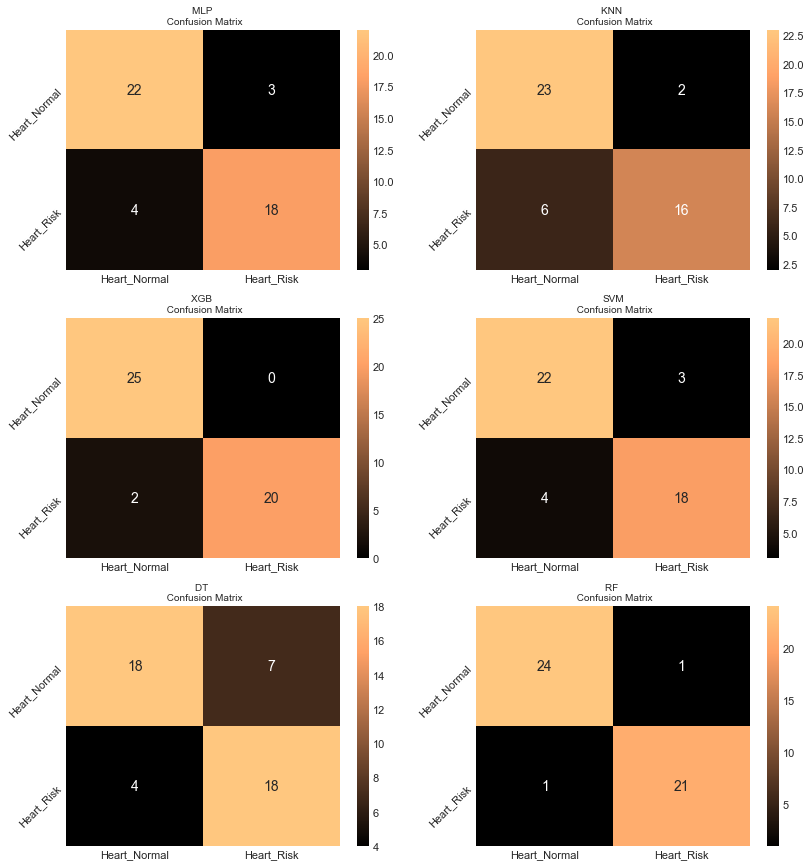

In [92]:
from sklearn.metrics import confusion_matrix

MLP=confusion_matrix(y_test,y_pred_mlp)
KNN=confusion_matrix(y_test,y_pred_knn)
XGB=confusion_matrix(y_test,y_pred_xgb)
SVM=confusion_matrix(y_test,y_pred_svm)
DT=confusion_matrix(y_test,y_pred_dtree)
RF=confusion_matrix(y_test,y_pred_rtree)


index=['Heart_Normal','Heart_Risk']
columns=['Heart_Normal','Heart_Risk']

fix,ax = plt.subplots(3,2,figsize=(12,14))

#ANN
sns.heatmap(MLP,ax=ax[0][0],annot=True,cmap=plt.cm.copper,fmt='g')
ax[0,0].set_title("MLP \n Confusion Matrix",fontsize=10)
ax[0,0].set_xticklabels(['Heart_Normal','Heart_Risk'],rotation=0)
ax[0,0].set_yticklabels(['Heart_Normal','Heart_Risk'],rotation=45)

#KNN
sns.heatmap(KNN,ax=ax[0][1],annot=True,cmap=plt.cm.copper,fmt='g')
ax[0,1].set_title("KNN \n Confusion Matrix",fontsize=10)
ax[0,1].set_xticklabels(['Heart_Normal','Heart_Risk'],rotation=0)
ax[0,1].set_yticklabels(['Heart_Normal','Heart_Risk'],rotation=45)

#XGB
sns.heatmap(XGB,ax=ax[1][0],annot=True,cmap=plt.cm.copper,fmt='g')
ax[1,0].set_title("XGB \n Confusion Matrix",fontsize=10)
ax[1,0].set_xticklabels(['Heart_Normal','Heart_Risk'],rotation=0)
ax[1,0].set_yticklabels(['Heart_Normal','Heart_Risk'],rotation=45)

#SVM
sns.heatmap(SVM,ax=ax[1][1],annot=True,cmap=plt.cm.copper,fmt='g')
ax[1,1].set_title("SVM\n Confusion Matrix",fontsize=10)
ax[1,1].set_xticklabels(['Heart_Normal','Heart_Risk'],rotation=0)
ax[1,1].set_yticklabels(['Heart_Normal','Heart_Risk'],rotation=45)

#DT
sns.heatmap(DT,ax=ax[2][0],annot=True,cmap=plt.cm.copper,fmt='g')
ax[2,0].set_title("DT \n Confusion Matrix",fontsize=10)
ax[2,0].set_xticklabels(['Heart_Normal','Heart_Risk'],rotation=0)
ax[2,0].set_yticklabels(['Heart_Normal','Heart_Risk'],rotation=45)

#RF
sns.heatmap(RF,ax=ax[2][1],annot=True,cmap=plt.cm.copper,fmt='g')
ax[2,1].set_title("RF \n Confusion Matrix",fontsize=10)
ax[2,1].set_xticklabels(['Heart_Normal','Heart_Risk'],rotation=0)
ax[2,1].set_yticklabels(['Heart_Normal','Heart_Risk'],rotation=45)


# ROC_AUC_PLOT

In [93]:
#prediction Probabilities
r_probs=[0 for _ in range(len(y_test))]
knn_probs = knn.predict_proba(X_test)
dtree_probs=dtree.predict_proba(X_test)
rtree_probs=rtree.predict_proba(X_test)
svm_probs=svm.predict_proba(X_test)
xgb_probs=xgb.predict_proba(X_test)
mlp_probs=Mlp.predict_proba(X_test)

In [94]:
knn_probs = knn_probs[:,1]
dtree_probs=dtree_probs[:,1]
rtree_probs=rtree_probs[:,1]
svm_probs=svm_probs[:,1]
xgb_probs=xgb_probs[:,1]
mlp_probs=mlp_probs[:,1]

In [95]:
#Calculate AUROC
knn_auc = roc_auc_score(y_test,knn_probs)
dtree_auc = roc_auc_score(y_test,dtree_probs)
rtree_auc = roc_auc_score(y_test,rtree_probs)
svm_auc = roc_auc_score(y_test,svm_probs)
xgb_auc = roc_auc_score(y_test,xgb_probs)
mlp_auc = roc_auc_score(y_test,mlp_probs)

In [96]:
print('KNN: AUROC = %0.3f' % (knn_auc))
print('DTree: AUROC = %0.3f' % (dtree_auc))
print('RF: AUROC = %0.3f' % (rtree_auc))
print('SVM: AUROC = %0.3f' % (svm_auc))
print('XGB: AUROC = %0.3f' % (xgb_auc))
print('MLP: AUROC = %0.3f' % (mlp_auc))

KNN: AUROC = 0.935
DTree: AUROC = 0.769
RF: AUROC = 0.965
SVM: AUROC = 0.936
XGB: AUROC = 0.975
MLP: AUROC = 0.951


In [97]:
#predicting the test set results
rf_fpr,rf_tpr,_=roc_curve(y_test,rtree_probs)
dt_fpr,dt_tpr,_=roc_curve(y_test,dtree_probs)
kn_fpr,kn_tpr,_=roc_curve(y_test,knn_probs)
sv_fpr,sv_tpr,_=roc_curve(y_test,svm_probs)
xg_fpr,xg_tpr,_=roc_curve(y_test,xgb_probs)
mlp_fpr,mlp_tpr,_=roc_curve(y_test,mlp_probs)

In [98]:
def plot_roc_curve(rf_fpr,rf_tpr):
    plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest (AUROC = %0.3f)' %rtree_auc)
    plt.plot(dt_fpr,dt_tpr,marker='.',label='Decision Tree (AUROC = %0.3f)' %dtree_auc)
    plt.plot(kn_fpr,kn_tpr,marker='.',label='KNN (AUROC = %0.3f)' %knn_auc)
    plt.plot(sv_fpr,sv_tpr,marker='.',label='Support Vector Machine (AUROC = %0.3f)' %svm_auc)
    plt.plot(xg_fpr,xg_tpr,marker='.',label='XGBoost (AUROC = %0.3f)' %xgb_auc)
    plt.plot(mlp_fpr,mlp_tpr,marker='.',label='MLP (AUROC = %0.3f)' %mlp_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receive Operating Characteristic(ROC) Curve')
    plt.legend()
    plt.show()

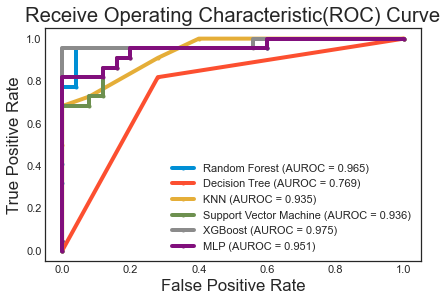

In [99]:
plot_roc_curve(rf_fpr,rf_tpr)